In [111]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
torch.cuda.is_available()

True

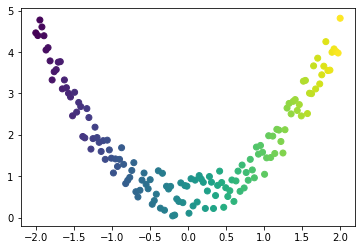

In [160]:
def create_data(nums, plot=False):
    x = torch.linspace(-2,2, nums)
    x = torch.unsqueeze(x, dim=1)
    y = x**2 + torch.rand(x.size())
    if plot:
        plt.scatter(x.numpy(), y.numpy( ),c=x.numpy())
        plt.show()
    data = {"x":x, "y":y}
    return data

data = create_data(150, True)
    


In [161]:
#help(torch.rand)
#help(torch.optim.SGD)
#help(torch.nn.Module.parameters)

In [162]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.line1 = torch.nn.Linear(1,5)
        self.line2 = torch.nn.Linear(5,10)
        self.line3 = torch.nn.Linear(10,5)
        self.line4 = torch.nn.Linear(5,1)
        #self.weight_init() #参数初始化得不好还会引起梯度爆炸，loss = nan
    
    def forward(self, x):
        x = self.line1(x)
        x = F.relu(self.line2(x))
        x = F.relu(self.line3(x))
        x = self.line4(x)
        return x
    
    def weight_init(self):
        for op in self.modules():
            if isinstance(op, nn.Linear):
                #torch.nn.init.normal_(op.weight.data, mean=0, std=1)
                nn.init.constant_(op.weight.data, val=1)
                nn.init.constant_(op.bias.data, val=1)
            else:
                pass
#net = Net()
#net

In [171]:
class Train():
    def __init__(self, net):
        self.learning_rate = 0.01
        self.epochs = 10000
        self.loss = torch.nn.MSELoss()
        self.model = net
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        
    
    def training(self, data, save_model=False):
        x = data['x']
        y = data['y']
        
        for epoch in range(self.epochs):
            prediction = self.model(x)
            loss = self.loss(prediction, y)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if epoch % 500 == 0:
                print("epoch: {}, loss = {}".format(epoch, loss.item()))
                
        torch.save(self.model.state_dict(), "./models/square.pth")

In [172]:
class Evaluate():
    def __init__(self, net):
        self.model = net
        
    def test(self, data, model_path):
        x = data["x"]
        y = data["y"]
        self.model.load_state_dict(torch.load(model_path))
        prediction = self.model(x)
        #print(x, y, prediction)
        plt.scatter(x.numpy(), y.numpy(), c=x.numpy())
        plt.plot(x.numpy(), prediction.detach().numpy(), color="r")
        plt.show()

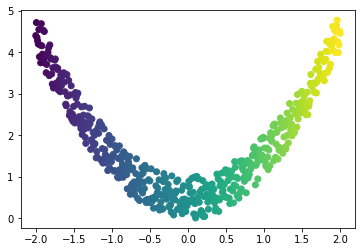

epoch: 0, loss = 4.733280181884766
epoch: 500, loss = 0.0790780782699585
epoch: 1000, loss = 0.07881162315607071
epoch: 1500, loss = 0.07874417304992676
epoch: 2000, loss = 0.07872365415096283
epoch: 2500, loss = 0.07870731502771378
epoch: 3000, loss = 0.07870690524578094
epoch: 3500, loss = 0.07869800180196762
epoch: 4000, loss = 0.07869570702314377
epoch: 4500, loss = 0.07871896028518677
epoch: 5000, loss = 0.07872921228408813
epoch: 5500, loss = 0.07865823060274124
epoch: 6000, loss = 0.07861367613077164
epoch: 6500, loss = 0.0786164402961731
epoch: 7000, loss = 0.07861874997615814
epoch: 7500, loss = 0.07862824946641922
epoch: 8000, loss = 0.07861464470624924
epoch: 8500, loss = 0.07872197031974792
epoch: 9000, loss = 0.0786665603518486
epoch: 9500, loss = 0.07863688468933105


In [173]:
net = Net()
data_train = create_data(500, True)
train = Train(net)
train.training(data_train, save_model=True)

In [166]:
for i in train.model.named_parameters():
    print(i)

('line1.weight', Parameter containing:
tensor([[-1.9306],
        [ 1.5025],
        [ 2.1741],
        [-2.4006],
        [-1.5929]], requires_grad=True))
('line1.bias', Parameter containing:
tensor([ 4.1517, -1.9132, -1.3015,  3.3933,  0.1746], requires_grad=True))
('line2.weight', Parameter containing:
tensor([[-2.2302, -0.7107, -1.8397, -2.4926, -0.8830],
        [-1.2638, -0.1908, -1.0157, -1.0877, -1.2105],
        [-0.3980,  1.9350,  0.1154,  1.0320,  0.8968],
        [-0.2927,  0.2795, -0.1571, -0.1007,  0.1048],
        [-1.4924, -0.9859, -2.5617, -0.7242, -0.1192],
        [ 2.5872,  2.2489,  3.6258,  2.1429, -1.7171],
        [-0.9307,  0.1378, -1.1927, -0.3610,  1.3767],
        [-0.1821,  3.2676, -5.5419,  1.9233,  2.1228],
        [-3.6380, -1.6261,  0.0698, -3.0900,  3.1777],
        [-2.3606,  2.9360, -4.8070, -2.8870,  0.8752]], requires_grad=True))
('line2.bias', Parameter containing:
tensor([-2.9132, -1.0782, -2.4261, -0.0232, -1.9317,  2.8792, -3.8004, -3.7540,
    

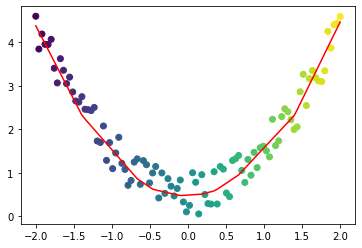

In [175]:
data_test = create_data(100)
evaluate = Evaluate(net)
evaluate.test(data_test, './models/square.pth')

In [174]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

### 模板
- 数据读取方法
- 网络结构类
- 训练类
- 测试类